### *Start with reading the dataset*

In [1]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("houserentdhaka.csv")
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


*Let's drop the unnecessary data column **Unnamed***

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


### *Let's do some data exploration and cleaning*

In [4]:
df.isna().sum()

Location    0
Area        0
Bed         0
Bath        0
Price       0
dtype: int64

*There is no **Missing values** in the dataset*

In [5]:
df.dtypes

Location    object
Area        object
Bed          int64
Bath         int64
Price       object
dtype: object

*Here **Area** and **Price** needs to converted from object type to integer type*

In [6]:
df['Area'] = df['Area'].str.replace(',', '').str.replace(' sqft', '').astype(int)
df.rename(columns={'Area':'Area(sqft)'}, inplace=True)
df.head()

,Location,Area(sqft),Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75 Thousand
4,"Baridhara, Dhaka",2200,3,3,75 Thousand


In [7]:
def convert_price(price):
    multipliers = {
        "Thousand": 1000,
        "Lakh": 100000,
        "Crore": 10000000
    }
    parts = price.split()
    if len(parts) == 2:
        number, unit = parts
        return float(number) * multipliers.get(unit, 1)
    return float(price)

In [8]:
df['Price'] = df['Price'].apply(convert_price).astype(int)
df.head()

,Location,Area(sqft),Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,"Baridhara, Dhaka",2200,3,3,75000


In [9]:
df.rename(columns={'Price': 'Price(Taka)'}, inplace=True)
df.head()

,Location,Area(sqft),Bed,Bath,Price(Taka)
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,"Baridhara, Dhaka",2200,3,3,75000


### *Now the dataset is clean and ready for analysis*

In [10]:
df.shape

(28800, 5)

In [11]:
df.dtypes

Location       object
Area(sqft)      int64
Bed             int64
Bath            int64
Price(Taka)     int64
dtype: object

### *Let's explore the Location*

In [12]:
df['Location'].nunique()

730

***Location** has **730** unique values which will be hard to visualize. So, lets extract locations into big areas*

In [13]:
df.head()

,Location,Area(sqft),Bed,Bath,Price(Taka)
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,"Baridhara, Dhaka",2200,3,3,75000


In [14]:
location = pd.DataFrame({
    'Location': df['Location'].str.split(',').apply(
        lambda x: x[-2].strip() if len(x) >= 2 else x[-1].strip()
    )
})

In [15]:
location.head()

,Location
0,Bashundhara R-A
1,Tejgaon
2,Mohammadpur
3,Gulshan
4,Baridhara


In [16]:
location['Price'] = df[['Price(Taka)']]
location.head()

,Location,Price
0,Bashundhara R-A,20000
1,Tejgaon,20000
2,Mohammadpur,18000
3,Gulshan,75000
4,Baridhara,75000


In [17]:
location.shape

(28800, 2)

In [18]:
location[location['Location']=='Dhaka'].count()

Location    13
Price       13
dtype: int64

In [19]:
location.drop(location[location['Location'] == 'Dhaka'].index, axis=0, inplace=True)

In [20]:
location.shape

(28787, 2)

In [21]:
new_location = location.groupby('Location')['Price'].mean().reset_index()
new_location.columns = ['Location', 'Price']
new_location.head()

,Location,Price
0,Adabor,17496.316759
1,Aftab Nagar,19322.539683
2,Agargaon,16352.189781
3,Badda,15947.657018
4,Banani,81178.564286


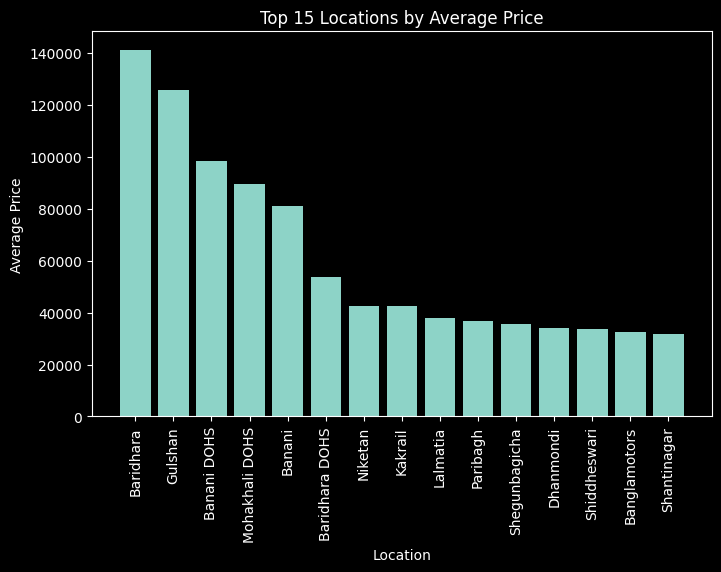

In [50]:
top_15_locations = new_location.sort_values(by='Price', ascending=False).head(15)

plt.figure(figsize=(8, 5))
plt.bar(top_15_locations['Location'], top_15_locations['Price'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Top 15 Locations by Average Price')
plt.style.use('dark_background')
plt.show()

*The bar chart shows the **Top 15 locations** in Dhaka with **Higher Average Rent***

### HeatMap For better Visualization* 

In [23]:
import folium
from folium.plugins import HeatMap

In [24]:
location_coords = {
    "Adabor": (23.7625, 90.3708),"Aftab Nagar": (23.7981, 90.4272),"Agargaon": (23.7806, 90.3792),"Badda": (23.7906, 90.4236),"Banani": (23.7942, 90.4053),"Banani DOHS": (23.8153, 90.4147),"Banasree": (23.7683, 90.4286),"Banglamotors": (23.7464, 90.3842),"Bangshal": (23.7156, 90.4067),"Baridhara": (23.8103, 90.4258),"Baridhara DOHS": (23.8153, 90.4147),"Bashabo": (23.7431, 90.4267),"Bashundhara R-A": (23.8136, 90.4225),"Cantonment": (23.8236, 90.4056),"Dakshin Khan": (23.8656, 90.4308),"Demra": (23.7658, 90.4822),"Dhaka": (23.8103, 90.4125),"Dhanmondi": (23.7464, 90.3714),"Eskaton": (23.7333, 90.4083),"Gulshan": (23.7942, 90.4153),"Hatirpool": (23.7417, 90.3917),"Hazaribag": (23.7333, 90.3833),"Ibrahimpur": (23.7667, 90.3667),"Jatra Bari": (23.7500, 90.4167),"Joar Sahara": (23.7833, 90.4167),"Kachukhet": (23.8167, 90.4000),"Kafrul": (23.8000, 90.3833),"Kakrail": (23.7333, 90.4083),"Kalabagan": (23.7500, 90.3833),"Kalachandpur": (23.7667, 90.3667),"Kathalbagan": (23.7500, 90.3833),"Keraniganj": (23.7167, 90.3667),"Khilgaon": (23.7333, 90.4333),"Khilkhet": (23.8333, 90.4167),"Kotwali": (23.7167, 90.4000),"Kuril": (23.8167, 90.4167),"Lalbagh": (23.7167, 90.3833),"Lalmatia": (23.7667, 90.3667),"Maghbazar": (23.7500, 90.4000),"Malibagh": (23.7500, 90.4167),"Maniknagar": (23.7500, 90.4167),"Mirpur": (23.8000, 90.3667),"Mohakhali": (23.7833, 90.4000),"Mohakhali DOHS": (23.8153, 90.4147),"Mohammadpur": (23.7667, 90.3667),"Motijheel": (23.7333, 90.4167),"Mugdapara": (23.7500, 90.4167),"Nadda": (23.7833, 90.4167),"New Market": (23.7333, 90.4000),"Niketan": (23.7833, 90.4000),"Nikunja": (23.8167, 90.4167),"North Shahjahanpur": (23.7500, 90.4167),"Paribagh": (23.7333, 90.4000),"Rampura": (23.7500, 90.4167),"Sadarghat": (23.7167, 90.4000),"Shahbagh": (23.7333, 90.4000),"Shahjahanpur": (23.7500, 90.4167),"Shantinagar": (23.7333, 90.4000),"Shegunbagicha": (23.7333, 90.4000),"Shiddheswari": (23.7333, 90.4000),"Shyamoli": (23.7667, 90.3667),"Shyampur": (23.7167, 90.4000),"Sutrapur": (23.7167, 90.4000),"Taltola": (23.7500, 90.4167),"Tejgaon": (23.7500, 90.4000),"Turag": (23.8667, 90.3833),"Uttar Khan": (23.8667, 90.3833),"Uttara": (23.8667, 90.3833),"Zafrabad": (23.7500, 90.4167),
}

In [25]:
new_location['Latitude'] = new_location['Location'].map(lambda x: location_coords.get(x, (None, None))[0])
new_location['Longitude'] = new_location['Location'].map(lambda x: location_coords.get(x, (None, None))[1])
new_location.head()

,Location,Price,Latitude,Longitude
0,Adabor,17496.316759,23.7625,90.3708
1,Aftab Nagar,19322.539683,23.7981,90.4272
2,Agargaon,16352.189781,23.7806,90.3792
3,Badda,15947.657018,23.7906,90.4236
4,Banani,81178.564286,23.7942,90.4053


In [26]:
new_location.isna().sum()

Location     0
Price        0
Latitude     0
Longitude    0
dtype: int64

In [27]:
dhaka_map = folium.Map(location=[23.8103, 90.4125], zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude'], row['Price']] for index, row in new_location.iterrows()]

HeatMap(
    heat_data,
    radius=20,  # Increase the radius for larger color areas
    blur=15,    # Adjust blur for smoother transitions
    gradient={'0.4': 'blue', '0.65': 'lime', '1': 'red'}  # Custom gradient (keys as strings)
).add_to(dhaka_map)

dhaka_map

***From the heatmap we can have a clear idea about the Rent locationwise***

### *Now lets explore the impact of Bedroom/Bathroom numbers on House Rent*

In [28]:
bedrooms = df.groupby('Bed')['Price(Taka)'].mean().reset_index()
bathrooms = df.groupby('Bath')['Price(Taka)'].mean().reset_index()

In [29]:
bedrooms

,Bed,Price(Taka)
0,1,11088.026030
1,2,14139.180360
2,3,25084.157879
3,4,66325.845865
4,5,73833.333333
5,6,170000.000000


In [30]:
bathrooms

,Bath,Price(Taka)
0,1,12017.214014
1,2,14947.888064
2,3,25979.467171
3,4,52184.739746
4,5,91586.330935
5,6,140714.285714
6,8,300000.000000


In [31]:
bed_values = bedrooms['Bed'].astype(int)
bath_values = bathrooms['Bath'].astype(int)

In [32]:
bar_width=0.4
x_bed = np.arange(len(bed_values))
x_bath = np.arange(len(bath_values)) + bar_width 

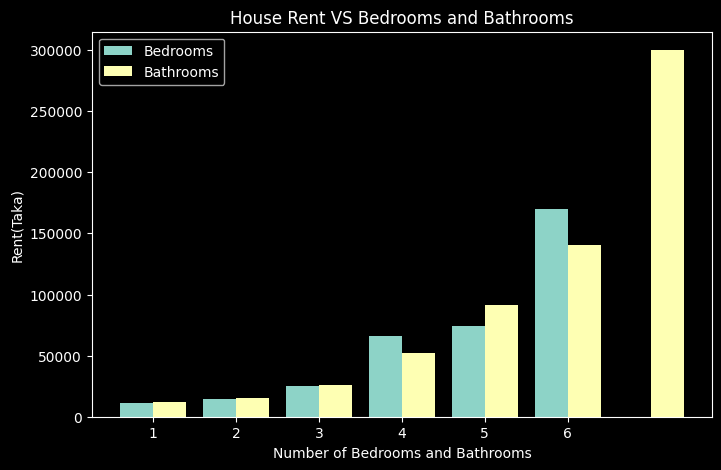

In [33]:
plt.figure(figsize=(8, 5))
plt.bar(x_bed,bedrooms['Price(Taka)'],width=bar_width,label='Bedrooms')
plt.bar(x_bath,bathrooms['Price(Taka)'],width=bar_width,label='Bathrooms')
plt.xticks(x_bed + bar_width / 2, bed_values)
plt.xlabel('Number of Bedrooms and Bathrooms')
plt.ylabel('Rent(Taka)')
plt.title('House Rent VS Bedrooms and Bathrooms')
plt.style.use('dark_background')
plt.legend()

*This bar chart shows the following relationship with Increasing Number of **Bedrooms/Bathrooms** and **House Rent***
- More bedrooms cause more Rent
- More bathrooms cause more Rent

### *Now the Areal Impect on House Rent*

In [34]:
df['Area(sqft)'].min()

np.int64(200)

In [35]:
df['Area(sqft)'].max()

np.int64(6300)

In [36]:
bins = [200, 1500, 2800, 4100, 5400, 6300]
labels = ['200-1500', '1500-2800', '2800-4100', '4100-5400', '5400-6300']

C:\Users\niloy\AppData\Local\Temp\ipykernel_7328\4202608656.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_price = price_range.groupby('Area Range')['Price(Taka)'].mean()


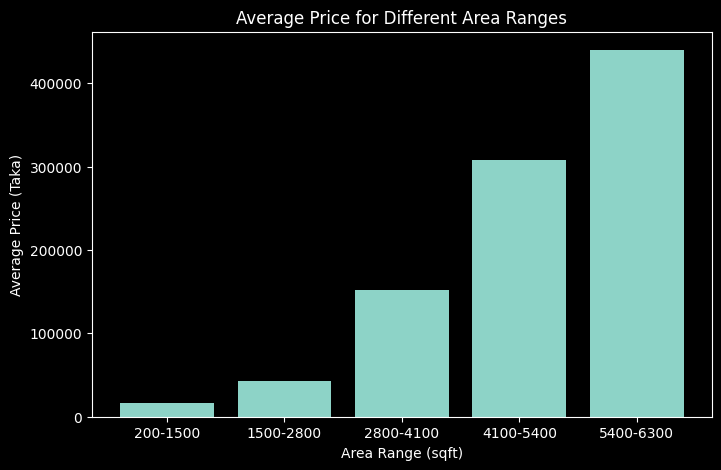

In [37]:
price_range = df
price_range['Area Range'] = pd.cut(price_range['Area(sqft)'], bins=bins, labels=labels, include_lowest=True)
area_price = price_range.groupby('Area Range')['Price(Taka)'].mean()
plt.figure(figsize=(8, 5))
plt.bar(area_price.index, area_price.values)
plt.xlabel('Area Range (sqft)')
plt.ylabel('Average Price (Taka)')
plt.title('Average Price for Different Area Ranges')
plt.style.use('dark_background')

*This shows the direct impact of **Area(sqft)** on **Rent***

### *Let's train a model for Rent prediction*

In [38]:
df.head()

,Location,Area(sqft),Bed,Bath,Price(Taka),Area Range
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000,1500-2800
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000,200-1500
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000,200-1500
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000,1500-2800
4,"Baridhara, Dhaka",2200,3,3,75000,1500-2800


*After analysis we can define these **Inputs** given below which are strongly related to the **Price(Taka)***
1. *Location*
2. *Area(sqft)*
3. *Bed*
4. *Bath*

In [39]:
inputs = df.drop(['Price(Taka)','Area Range'],axis=1)
inputs.head()

,Location,Area(sqft),Bed,Bath
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3
1,"Farmgate, Tejgaon, Dhaka",900,2,2
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4
4,"Baridhara, Dhaka",2200,3,3


In [40]:
outputs = df['Price(Taka)']
outputs.head()

0    20000
1    20000
2    18000
3    75000
4    75000
Name: Price(Taka), dtype: int64

### *Input Processing*

In [41]:
inputs.dtypes

Location      object
Area(sqft)     int64
Bed            int64
Bath           int64
dtype: object

In [42]:
inputs.select_dtypes(include=['object']).nunique()

Location    730
dtype: int64

*Here **Location** is in **Object** form and has **730 unique values**, it needs to be **encoded***

In [43]:
inputs = pd.get_dummies(inputs, columns=['Location'], drop_first=True)

In [44]:
inputs.head()

,Area(sqft),Bed,Bath,"Location_22 Bari, West Kazipara, Mirpur, Dhaka","Location_2nd Colony, Mirpur, Dhaka","Location_2nd Lane, Gopibag, Motijheel, Dhaka","Location_3rd Colony, Mirpur, Dhaka","Location_Aainusbag, Dakshin Khan, Dhaka","Location_Abdullahbag, Uttar Badda, Badda, Dhaka","Location_Abdur Rafique Housing Society, Shekhertek, Mohammadpur, Dhaka",...,"Location_West Nakhalpara, Tejgaon, Dhaka","Location_West Nandipara, Khilgaon, Dhaka","Location_West Nurer Chala, Nurer Chala, Badda, Dhaka","Location_West Pirerbag, Pirerbag, Mirpur, Dhaka","Location_West Rampura, Rampura, Dhaka","Location_West Shewrapara, Mirpur, Dhaka","Location_West Vatara, Vatara, Badda, Dhaka","Location_Zafrabad, Dhaka","Location_Zafrabad, Hazaribag, Dhaka","Location_aziz Moholla, Mohammadpur, Dhaka"
0,1600,3,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,900,2,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1250,3,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2200,3,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2200,3,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
inputs.shape

(28800, 732)

### *Training Model*

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, train_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

### *Model Score*

In [49]:
model.score(X_test, y_test)

0.7967533492542356